# Man, I Love Football
#### Rohit Pasumarthi, Tejas Vij, Manan Bhatt

## Introduction

In the world of football and sports betting, predicting winners is extremely important in a multi-billion industry. Many times, sports bettors are forced to use instincts to decide which team to bet on to win, but we want to get rid of instincts and use a machine learning model to give us a better prediction on winners for a game. 

Our first step in this tutorial was to tidy up the data we collected from [Pro Football Focus](https://www.pro-football-reference.com/). We went through the six CSV files, three of which were for offense and other three for defense. We tidied up by removing unnecessary columns that we believe won’t help us get the stats we need to predict scores. The next step was to visualize the data we gathered, and we chose specific stats to let us understand what information we should feed to our machine learning model. 

The final step before getting scores is to build the machine learning model. By gathering stats from previous weeks, we built our machine learning model to predict scores for a certain week. Our machine learning model will be taking the stats, which includes offensively: yards rushing, passing, touchdowns scored, and defensively: yards rushing, passing, touchdowns allowed of our home teams and the stats of our away team which gather the same stats.


# Getting Started with the Data

We make use of Python 3 along with a few imported libraries: [pandas](https://pandas.pydata.org/pandas-docs/stable/pandas.pdf), [numpy](https://numpy.org/doc/stable/index.html), [matplotlib](https://matplotlib.org/stable/users/index.html), [seaborn](https://seaborn.pydata.org/), and more.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stat
header_row = 0

# Preprocessing the Data

The three offensive CSVs we chose came from [Pro Football Focus Offensive Stats ](https://www.pro-football-reference.com/years/2021/). You can gather whichever years data you would like by replacing the four numbers at the end. For “Team Offense”, “Passing Offense”, and “Rushing Offense”, you can press “Share & Export” and select “Get table as CSV (for Excel)”. Copy the information from here to a CSV you want to read from. You can do the same for the [Pro Football Focus Defensive Stats](https://www.pro-football-reference.com/years/2021/opp.htm) here.

In [37]:
offense_stats = pd.read_csv('offense_stats.csv')
defense_stats = pd.read_csv('defense_stats.csv')
passing_stats = pd.read_csv('passing_stats.csv')
passdef_stats = pd.read_csv('passdef_stats.csv')
rushing_stats = pd.read_csv('rushing_stats.csv')
rushdef_stats = pd.read_csv('rushdef_stats.csv')

# Reading the Data

In [38]:
offense_stats.columns = offense_stats.iloc[header_row]
offense_stats = offense_stats.drop(header_row)

defense_stats.columns = defense_stats.iloc[header_row]
defense_stats = defense_stats.drop(header_row)

The way the data is read is by using .read_csv(). This resulted in the header becoming the first row so we named the columns the first row, and dropped the first column containing the header name.

# Tidying and Modifying the Data

By following the steps above, you will have six dataframes that have a lot of information, a lot which we can remove. By tidying, we removed a lot of the unnecessary information. Follow the code below to see which columns that we will remove from the offense and defense dataframes.

In [48]:
offense_stats = pd.read_csv('offense_stats.csv') # Offensive Stats
offense_stats.columns = offense_stats.iloc[header_row]
offense_stats = offense_stats.drop(header_row)
offense_stats = offense_stats.drop(columns=['Pen'])
offense_stats = offense_stats.drop(columns=['TO%'])
offense_stats = offense_stats.drop(columns=['Sc%'])
offense_stats = offense_stats.drop(columns=['Rk'])
offense_stats = offense_stats.drop(columns=['1stPy'])
offense_stats = offense_stats.iloc[: , :-2]
offense_stats = offense_stats.drop(columns=['1stD'])
offense_stats = offense_stats.drop(columns=['FL'])
offense_stats.columns = ['Team', 'Games','Total Points For','Total Yards', 'Total Plays', 'Total Yards/Play', 'Total Turnovers', 'Passing Completions', 'Passing Attempts', 'Passing Yards',\
    'Passing TD', 'Passing Int', 'Net Yards/Attempt', 'Rushing Attempts', 'Total Rushing Yards', 'Rushing TDs', 'Yards/Attempt']
offense_stats = offense_stats.drop([33, 34,35])
offense_stats = offense_stats.sort_values(by=['Team']).reset_index(drop=True)
offense_stats.head()

,Team,Games,Total Points For,Total Yards,Total Plays,Total Yards/Play,Total Turnovers,Passing Completions,Passing Attempts,Passing Yards,Passing TD,Passing Int,Net Yards/Attempt,Rushing Attempts,Total Rushing Yards,Rushing TDs,Yards/Attempt
0,Arizona Cardinals,13,366,4872,845,5.8,13,304,420,3279,22,10,7.3,394,1593,21,4.0
1,Atlanta Falcons,13,245,4113,805,5.1,20,307,461,2929,17,14,6.0,318,1184,8,3.7
2,Baltimore Ravens,13,304,5044,921,5.5,20,304,467,3161,17,14,6.1,407,1883,14,4.6
3,Buffalo Bills,13,363,4978,853,5.8,18,330,502,3405,28,12,6.5,329,1573,13,4.8
4,Carolina Panthers,13,257,4038,838,4.8,23,262,447,2612,11,17,5.5,359,1426,15,4.0


We removed nine columns from the original offensive stat dataframe, since based on our research we found high levels of deviation that would affect the final result we would get from our predicted scores. Stats like penalties, rank, first downs, first down percentage, and fumbles lost were categories we felt we covered with other stats we are crunching. Stats like turnover percentage and sack percentage were best fit by getting numbers from the opposing defense. The stats we need to focus on are: 'Team', 'Games', 'Total Points For', 'Total Yards', 'Total Plays', 'Total Yards/Play', 'Total Turnovers', 'Passing Completions', 'Passing Attempts', 'Passing Yards', 'Passing TD', 'Passing Int', 'Net Yards/Attempt', 'Rushing Attempts', 'Total Rushing Yards', 'Rushing TDs', 'Yards/Attempt'

In [40]:
passing_stats = pd.read_csv('passing_stats.csv') # Passing Stats
passing_stats = passing_stats.drop(columns=['4QC'])
passing_stats = passing_stats.drop(columns=['GWD'])
passing_stats = passing_stats.drop(columns=['Sk%'])
passing_stats = passing_stats.drop(columns=['Rk'])
passing_stats = passing_stats.drop(columns=['EXP'])
passing_stats = passing_stats.drop(columns=['Yds.1'])
passing_stats = passing_stats.drop(columns=['Int%'])
passing_stats = passing_stats.drop(columns=['TD%'])
passing_stats = passing_stats.drop(columns=['Rate'])
passing_stats = passing_stats.drop(columns=['Sk'])
passing_stats = passing_stats.drop(columns=['Lng'])
passing_stats = passing_stats.rename(columns={"Tm": "Team", "G": "Games", "Ply": "Total Ply", "Y/P":"Total Y/P", 'Cmp':'Completions', 'Cmp%':'Completion %'})
passing_stats.rename(columns={passing_stats.columns[5]: "Total Yards" }, inplace = True)
passing_stats = passing_stats.drop([32, 33,34])
passing_stats = passing_stats.sort_values(by=['Team']).reset_index(drop=True)
passing_stats.head()

,Team,Games,Completions,Att,Completion %,Total Yards,TD,Int,Y/A,AY/A,Y/C,Y/G,NY/A,ANY/A
0,Arizona Cardinals,13.0,304.0,420.0,72.4,3279.0,22.0,10.0,8.4,8.4,11.6,252.2,7.3,7.2
1,Atlanta Falcons,13.0,307.0,461.0,66.6,2929.0,17.0,14.0,6.8,6.1,10.2,225.3,6.0,5.4
2,Baltimore Ravens,13.0,304.0,467.0,65.1,3161.0,17.0,14.0,7.3,6.7,11.2,243.2,6.1,5.6
3,Buffalo Bills,13.0,330.0,502.0,65.7,3405.0,28.0,12.0,7.1,7.1,10.8,261.9,6.5,6.5
4,Carolina Panthers,13.0,262.0,447.0,58.6,2612.0,11.0,17.0,6.3,5.1,10.7,200.9,5.5,4.3


Similar to the offense dataframe we previously covered, we tidied up the data we need to use by focusing on the stats we will feed to our machine learning model.

In [41]:
rushing_stats = pd.read_csv('rushing_stats.csv') 
rushing_stats = rushing_stats.drop(columns=['Rk'])
rushing_stats = rushing_stats.drop(columns=['EXP'])
rushing_stats = rushing_stats.drop(columns=['Lng'])
rushing_stats = rushing_stats.rename(columns={"Tm": "Team", "G": "Games"})
rushing_stats.rename(columns={rushing_stats.columns[3]: "Total Yards" }, inplace = True)
rushing_stats = rushing_stats.drop([32,33,34])
rushing_stats = rushing_stats.sort_values(by=['Team']).reset_index(drop=True)
rushing_stats.head()

,Team,Games,Att,Total Yards,TD,Y/A,Y/G,Fmb
0,Arizona Cardinals,13.0,394.0,1593.0,21.0,4.0,122.5,25.0
1,Atlanta Falcons,13.0,318.0,1184.0,8.0,3.7,91.1,18.0
2,Baltimore Ravens,13.0,407.0,1883.0,14.0,4.6,144.8,16.0
3,Buffalo Bills,13.0,329.0,1573.0,13.0,4.8,121.0,19.0
4,Carolina Panthers,13.0,359.0,1426.0,15.0,4.0,109.7,15.0


Accounting for passing, it is important to categorize and tidy up the running game for NFL teams. We did that by removing rank, expected points (which we are attempting to prove), and the longest run a team had.

In [72]:
defense_stats = pd.read_csv('defense_stats.csv', index_col=False) # Defensive Stats
defense_stats.columns = defense_stats.iloc[header_row]
defense_stats = defense_stats.drop(header_row)
defense_stats = defense_stats.drop(columns= ["FL"])
defense_stats = defense_stats.drop(columns= ["1stD"])
defense_stats = defense_stats.drop(columns= ["TO%"])
defense_stats = defense_stats.drop(columns= ["Sc%"])
defense_stats = defense_stats.drop(columns= ["EXP"])
defense_stats = defense_stats.drop(columns= ["Pen"])
defense_stats = defense_stats.drop(columns= ["1stPy"])
defense_stats = defense_stats.drop(columns= ["Int"])
defense_stats = defense_stats.drop(columns= ["TD"])
defense_stats = defense_stats.drop(columns= ["Cmp"])
defense_stats = defense_stats.drop(columns= ["Att"])
# defense_stats = defense_stats.drop(columns= defense_stats.columns[[16]], axis=1)
defense_stats = defense_stats.iloc[:,~defense_stats.columns.duplicated()]
defense_stats = defense_stats.rename(columns={"Tm": "Team", "G": "Games", "Yds": "Total Yards Allowed", "Ply": "Total Ply", "NY/P":"Net Yards per Pass Allowed", "Y/A":"Rushing Yards Allowed"\
    , "TO":"Total TOs", "PA":"Points Allowed"})
defense_stats = defense_stats.drop([33, 34,35])
defense_stats = defense_stats.sort_values(by=['Team']).reset_index(drop=True)
defense_stats.head()

,Rk,Team,Games,Points Allowed,Total Yards Allowed,Total Ply,Y/P,Total TOs,NY/A,Rushing Yards Allowed
0,4,Arizona Cardinals,13,254,4181,789,5.3,23,5.7,4.7
1,28,Atlanta Falcons,13,353,4739,848,5.6,15,6.6,4.2
2,10,Baltimore Ravens,13,284,4570,773,5.9,11,7.0,3.9
3,3,Buffalo Bills,13,229,3756,787,4.8,26,5.3,4.1
4,8,Carolina Panthers,13,282,3809,783,4.9,15,5.6,4.1


To get to the model itself, we need to make sure our defense is also tidied up. Our machine learning model takes into account both the offense and defense to make a prediction on the outcome of a certain weeks matchups are. Here, we want to get the points allowed, yards allowed, total defensive snaps, yards allowed per play, total turnovers created, net yards per rush, and the  yards per attempt allowed by defenses.

In [49]:
passdef_stats = pd.read_csv('passdef_stats.csv') # Passing Defense Stats
passdef_stats = passdef_stats.drop(columns= ["Rk"])
passdef_stats = passdef_stats.drop(columns= ["QBHits"])
passdef_stats = passdef_stats.drop(columns= ["PD"])
passdef_stats = passdef_stats.drop(columns= ["Rate"])
passdef_stats = passdef_stats.drop(columns= ["Sk"])
passdef_stats = passdef_stats.drop(columns= ["Yds.1"]) 
passdef_stats = passdef_stats.drop(columns= ["TFL"])
passdef_stats = passdef_stats.drop(columns= ["Sk%"])
passdef_stats = passdef_stats.drop(columns= ["EXP"])
passdef_stats = passdef_stats.drop([32,33, 34])
passdef_stats = passdef_stats.sort_values(by=['Tm']).reset_index(drop=True)
passdef_stats.head()

,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,NY/A,ANY/A
0,Arizona Cardinals,13.0,288.0,442.0,65.2,2728.0,19.0,4.3,12.0,2.7,6.6,6.3,10.2,209.8,5.7,5.4
1,Atlanta Falcons,13.0,321.0,468.0,68.6,3217.0,26.0,5.6,8.0,1.7,7.2,7.5,10.5,247.5,6.6,7.0
2,Baltimore Ravens,13.0,281.0,465.0,60.4,3459.0,21.0,4.5,6.0,1.3,7.8,8.2,13.0,266.1,7.0,7.4
3,Buffalo Bills,13.0,245.0,417.0,58.8,2334.0,10.0,2.4,16.0,3.8,5.9,4.7,10.0,179.5,5.3,4.1
4,Carolina Panthers,13.0,254.0,383.0,66.3,2310.0,18.0,4.7,8.0,2.1,6.7,6.7,10.1,177.7,5.6,5.6


To figure out who can or cannot hold with the pass offenses of the NFL, we want to make use of the pass defensive stats we gathered from Pro Football Focus. Here, we can see the stats allowed by defenses. We use this information in the machine learning model, since we know that not all pass offenses are able to do what they do on a weekly basis, and the strength of the defense matters.

In [44]:
rushdef_stats = pd.read_csv('rushdef_stats.csv') 
rushdef_stats = rushdef_stats.drop(columns= ["EXP"])
rushdef_stats = rushdef_stats.drop(columns= ["Rk"])
rushdef_stats = rushdef_stats.drop([32,33, 34])
rushdef_stats = rushdef_stats.sort_values(by=['Tm']).reset_index(drop=True)
rushdef_stats.head()

,Tm,G,Att,Yds,TD,Y/A,Y/G
0,Arizona Cardinals,13.0,312.0,1453.0,8.0,4.7,111.8
1,Atlanta Falcons,13.0,364.0,1522.0,12.0,4.2,117.1
2,Baltimore Ravens,13.0,282.0,1111.0,10.0,3.9,85.5
3,Buffalo Bills,13.0,347.0,1422.0,14.0,4.1,109.4
4,Carolina Panthers,13.0,368.0,1499.0,11.0,4.1,115.3


Similar to what we did with passing stats, we want to do to rushing stats so we can gather the information we need to feed our machine learning model.

# Exploratory Data Analysis

Based on the data we have tidied up, we want to visualize our collected data to make sure we know what we are doing. This tutorial is meant to show how we came up with our machine learning model and it started with the visualizations we did under.

## Points Allowed Per Game vs Points Scored Per Game

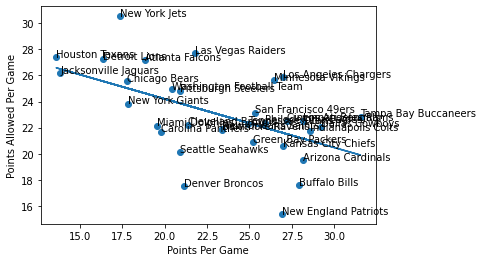

In [45]:
offense_stats['Points Per Game'] = offense_stats['Total Points For'].astype(float) / offense_stats['Games'].astype(float)
ppg = offense_stats['Points Per Game']
defense_stats['Points Allowed Per Game'] = defense_stats['Points Allowed'].astype(float) / defense_stats['Games'].astype(float)
papg = defense_stats['Points Allowed Per Game']

plt.scatter(offense_stats['Points Per Game'], defense_stats['Points Allowed Per Game'])
plt.xlabel("Points Per Game")
plt.ylabel("Points Allowed Per Game")
m, b = np.polyfit(offense_stats['Points Per Game'].head(32), defense_stats['Points Allowed Per Game'], 1)
plt.plot(offense_stats['Points Per Game'], m*offense_stats['Points Per Game'] + b)
for i, row in offense_stats.iterrows():
    plt.annotate(row.Team, (ppg[i], papg[i]))

On our first visualization, what we are looking for is how teams stack up in Points Allowed Per Game vs Points Scored Per Game. What we want to see here is the quartet in which each team is placed. The bottom right being the best (also where most of the current playoff contenders are) and the top left is where teams have let the most points without scoring near that (these tend to be teams higher up the draft)

## Defensive Passing Efficiency vs Offensive Passing Efficiency

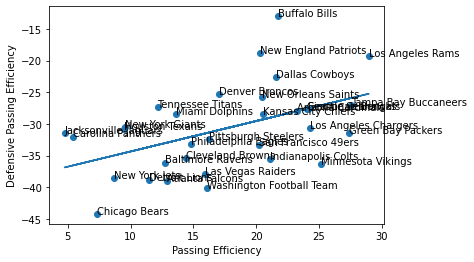

In [56]:
passing_stats['Passing Efficiency'] = ((passing_stats["Completion %"].astype(float) * (passing_stats["Total Yards"].astype(float)/passing_stats["Att"].astype(float))) + \
    (passing_stats["Completion %"].astype(float) * (passing_stats["TD"].astype(float)/passing_stats["Att"].astype(float))*100*6) - \
    (passing_stats["Completion %"].astype(float) * (passing_stats["Int"].astype(float)/passing_stats["Att"].astype(float))*100*3)) / 100
passdef_stats['Defensive Passing Efficiency'] = (passdef_stats["Int%"].astype(float))*3 - \
    (passdef_stats["TD%"].astype(float))*(6) - \
    (passdef_stats["Y/C"].astype(float))

plt.scatter(passing_stats['Passing Efficiency'], passdef_stats['Defensive Passing Efficiency'])
plt.xlabel("Passing Efficiency")
plt.ylabel("Defensive Passing Efficiency")

m, b = np.polyfit(passing_stats['Passing Efficiency'].head(32), passdef_stats['Defensive Passing Efficiency'], 1)
plt.plot(passing_stats['Passing Efficiency'], m*passing_stats['Passing Efficiency'] + b)
for i, row in passing_stats.iterrows():
    plt.annotate(row.Team, (passing_stats['Passing Efficiency'][i], passdef_stats['Defensive Passing Efficiency'][i]))

Our second visualization is to help us see the Defensive Passing Efficiency vs Offensiving Passing Efficiency among NFL teams. Having a high Passing Efficiency tells us a team tends to take advantage of their pass game. The Defensiving Passing Efficiency helps us tell how teams matchup on the other side of the field. Teams with a lower passing efficiency tend to let their opponents use their pass game efficiently. Your team would want to be in the top right corner, and your team needs to help their offense and defense pass games if you are in the bottom left.

## Defensive Rushing Efficiency vs Offensive Rushing Efficiency

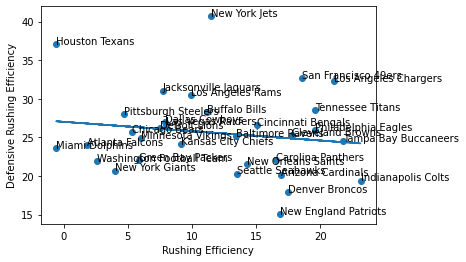

In [47]:
rushing_stats['Rushing Efficiency'] = (rushing_stats["Y/A"].astype(float))\
     + (rushing_stats["TD"].astype(float) /rushing_stats["Att"].astype(float)) * 100*6\
     - (rushing_stats["Fmb"].astype(float) /rushing_stats["Att"].astype(float)) * 100*3
rushdef_stats['Defensive Rushing Efficiency'] = (rushdef_stats["Y/A"].astype(float)) + ((rushdef_stats["TD"].astype(float) /rushdef_stats["Att"].astype(float)) * 100)*6
plt.scatter(rushing_stats['Rushing Efficiency'], rushdef_stats['Defensive Rushing Efficiency'])
plt.xlabel("Rushing Efficiency")
plt.ylabel("Defensive Rushing Efficiency")

m, b = np.polyfit(rushing_stats['Rushing Efficiency'].head(32), rushdef_stats['Defensive Rushing Efficiency'], 1)
plt.plot(rushing_stats['Rushing Efficiency'], m*rushing_stats['Rushing Efficiency'] + b)
for i, row in rushing_stats.iterrows():
    plt.annotate(row.Team, (rushing_stats['Rushing Efficiency'][i], rushdef_stats['Defensive Rushing Efficiency'][i]))

Similar to the visualization we saw with passing, we will do the same with the run game. We are comparing Defensive Rushing Efficiency vs Offensive Rushing Efficiency. Teams that are able to run the well efficiently as well as be able to defend the run are found on the bottom right corner of the graph. Teams that don't have a productive run offense and literally and figuratively get "run" on are found on the top left corner. It seems the Houston Texans are by far the worst team when it comes to having a run game and defending the run.

# Run Plays vs Pass Plays

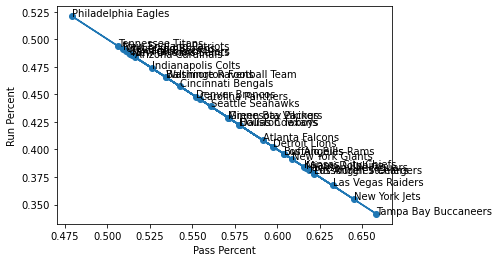

In [63]:
# Run vs Pass
offense_stats['Total Plays(Only Run and Pass'] = offense_stats['Passing Attempts'].astype(float) + offense_stats['Rushing Attempts'].astype(float)
offense_stats['Pass Percent'] = offense_stats['Passing Attempts'].astype(float)/offense_stats['Total Plays(Only Run and Pass'].astype(float)
offense_stats['Run Percent'] = offense_stats['Rushing Attempts'].astype(float)/offense_stats['Total Plays(Only Run and Pass'].astype(float)

plt.scatter(offense_stats['Pass Percent'], offense_stats['Run Percent'])
plt.xlabel("Pass Percent")
plt.ylabel("Run Percent")
m, b = np.polyfit(offense_stats['Pass Percent'].head(32), offense_stats['Run Percent'], 1)
plt.plot(offense_stats['Pass Percent'], m*offense_stats['Pass Percent'] + b)
for i, row in offense_stats.iterrows():
    plt.annotate(row.Team, (offense_stats['Pass Percent'][i], offense_stats['Run Percent'][i]))

While the linear line doesn't make much sense looking at it at first, what we see here is teams who run the ball more compared to other teams on the top left side of the line and teams who on average pass the ball more on the bottom right side of the line. This graph will make a lot more sense once we put it into our regression and machine learning model.

## How dominant is Jonathan Taylor?

In [54]:
jt_df = rushing_stats.loc[rushing_stats['Total Yards'] < 1348]
jt_df

,Team,Games,Att,Total Yards,TD,Y/A,Y/G,Fmb,Rushing Efficiency
1,Atlanta Falcons,13.0,318.0,1184.0,8.0,3.7,91.1,18.0,1.813208
12,Houston Texans,13.0,310.0,1008.0,6.0,3.3,77.5,16.0,-0.570968
14,Jacksonville Jaguars,13.0,288.0,1335.0,11.0,4.6,102.7,19.0,7.725000
16,Las Vegas Raiders,13.0,288.0,1100.0,11.0,3.8,84.6,18.0,7.966667
18,Los Angeles Rams,13.0,311.0,1264.0,8.0,4.1,97.2,10.0,9.887781
19,Miami Dolphins,13.0,311.0,1030.0,9.0,3.3,79.2,22.0,-0.558521
23,New York Giants,13.0,303.0,1225.0,8.0,4.0,94.2,16.0,4.000000
24,New York Jets,13.0,277.0,1094.0,9.0,3.9,84.2,11.0,11.481227
26,Pittsburgh Steelers,13.0,308.0,1149.0,8.0,3.7,88.4,15.0,4.674026
29,Tampa Bay Buccaneers,13.0,292.0,1248.0,14.0,4.3,96.0,11.0,21.765753


From this analysis, we wanted to compare the rushing stats of teams compared to the rushing leader in the NFL. We can conclude that the Jags, Rams, Bucs, Giants, Falcons, Steelers, Raiders, Jets, Dolphins, and Texans have less total rush yards than Jonathan Taylor alone which is a surprising stat ESPN might show you.

In [73]:
df = pd.DataFrame(offense_stats['Team'])
df['RushPercent'] = offense_stats['Run Percent']
df['RushEfficiency'] = rushing_stats['Rushing Efficiency']
df['PassPercent'] = offense_stats['Pass Percent']
df['PassEfficiency'] = passing_stats['Passing Efficiency']
df['DRushEfficiency'] = rushdef_stats['Defensive Rushing Efficiency']
df['DPassEfficiency'] = passdef_stats['Defensive Passing Efficiency']
df['DefenseRank'] = defense_stats['Rk']
df['OffensiveTO%'] = offense_stats['Total Turnovers'].astype(float)/offense_stats['Total Plays'].astype(float)
df['DefensiveTO%'] = defense_stats['Total TOs'].astype(float)/defense_stats['Total Ply'].astype(float)
df.insert(10, "Value", 1)
df.head()

,Team,RushPercent,RushEfficiency,PassPercent,PassEfficiency,DRushEfficiency,DPassEfficiency,DefenseRank,OffensiveTO%,DefensiveTO%,Value
0,Arizona Cardinals,0.484029,16.944162,0.515971,23.235229,20.084615,-27.9,4,0.015385,0.029151,1
1,Atlanta Falcons,0.408216,1.813208,0.591784,12.899597,23.980220,-39.0,28,0.024845,0.017689,1
2,Baltimore Ravens,0.465675,13.445209,0.534325,12.770473,25.176596,-36.1,10,0.021716,0.014230,1
3,Buffalo Bills,0.395909,11.182979,0.604091,21.732042,28.307493,-13.0,3,0.021102,0.033037,1
4,Carolina Panthers,0.445409,16.534819,0.554591,5.390676,22.034783,-32.0,8,0.027446,0.019157,1


In [74]:
from statsmodels.formula.api import ols
formula_str = "Value ~ ((RushPercent * RushEfficiency) + (PassPercent * PassEfficiency)) - ((RushPercent * DRushEfficiency) - (PassPercent * DPassEfficiency)) - (DefenseRank * (OffensiveTO% - DefensiveTO%))"
mod = ols(formula=formula_str, data=df).fit()
mod.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -5.200
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               1.00
Time:                        02:01:53   Log-Likelihood:                 1058.4
No. Observations:                  32   AIC:                            -2105.
Df Residuals:                      26   BIC:                            -2096.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0000   8.41e-15   1.19e+14      0.000       1.000       1.000
RushEfficiency             -8.327e-17   3.81e-16     -0.219      0.828   -8.65e-16    6.99e-16
RushPercent:RushEfficiency  2.776e-16   8.81e-16      0.315      0.755   -1.53e-15    2.09e-15
PassPercent                 3.553e-15   1.43e-14      0.249      0.805   -2.58e-14    3.29e-14
PassEfficiency              5.551e-17   4.88e-16      0.114      0.910   -9.48e-16    1.06e-15
PassPercent:PassEfficiency -3.331e-16   8.47e-16     -0.393      0.697   -2.07e-15    1.41e-15
==============================================================================
Omnibus:                        1.210   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.150
Skew:                           0.332   Prob(JB):                        0.563
Kurtosis:                       2.350   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
df['Value'] = ((df['RushPercent'] * df['RushEfficiency']) + (df['PassPercent'] * df['PassEfficiency'])) - ((df['RushPercent'] * df['DRushEfficiency']) - (df['PassPercent'] * df['DPassEfficiency'])) - (df['DefenseRank'].astype(float) * (df['OffensiveTO%'] - df['DefensiveTO%']) + 1.0)
df

,Team,RushPercent,RushEfficiency,PassPercent,PassEfficiency,DRushEfficiency,DPassEfficiency,DefenseRank,OffensiveTO%,DefensiveTO%,Value
0,Arizona Cardinals,0.484029,16.944162,0.515971,23.235229,20.084615,-27.9,4,0.015385,0.029151,-4.871892
1,Atlanta Falcons,0.408216,1.813208,0.591784,12.899597,23.980220,-39.0,28,0.024845,0.017689,-25.695101
2,Baltimore Ravens,0.465675,13.445209,0.534325,12.770473,25.176596,-36.1,10,0.021716,0.014230,-19.003415
3,Buffalo Bills,0.395909,11.182979,0.604091,21.732042,28.307493,-13.0,3,0.021102,0.033037,-2.468985
4,Carolina Panthers,0.445409,16.534819,0.554591,5.390676,22.034783,-32.0,8,0.027446,0.019157,-18.273330
5,Chicago Bears,0.487316,5.321918,0.512684,7.360391,25.728571,-44.2,24,0.027813,0.013871,-30.166157
6,Cincinnati Bengals,0.457143,15.079545,0.542857,24.079514,26.625597,-27.6,17,0.025894,0.020656,-8.278359
7,Cleveland Browns,0.488918,17.800000,0.511082,14.376714,25.338938,-35.4,14,0.017478,0.019925,-15.396287
8,Dallas Cowboys,0.422145,7.878689,0.577855,21.550491,27.000000,-22.6,12,0.020179,0.032847,-9.526428
9,Denver Broncos,0.447570,17.457143,0.552430,17.011493,17.904823,-25.3,2,0.018405,0.020487,-5.775022


In [76]:
def simulate_game():
    sim = df.sample(n = 2)
    name1 = sim.iloc[0,0]
    name2 = sim.iloc[1,0]
    print("It's the " + str(name1) + " vs the " + str(name2) + "!")
    val1 = sim.iloc[0,10]
    val2 = sim.iloc[1,10]
    if val1 > val2:
        print("The " + str(name1) + " will beat the " + str(name2) + "!")
    elif val2 > val1:
        print("The " + str(name2) + " will beat the " + str(name1) + "!")
    else:
        print("The " + str(name1) + " and the " + str(name2) + "will tie" "!")
    print('\n')

# Conclusion and Further Exploration

At the conclusion of this tutorial, we believe our code well written, well documented, reproducible, and does it help the reader understand the tutorial. The data we gathered, the methodology we used, the visualizations we made to help our readers see our vision, and the machine learning model we produced to help readers and users get an idea on how we can predict future games. While there is a lot of data being crunched, we hope our tutorial was beneficial to you.

While we are able to predict many games ahead, our machine learning model makes some "controversial calls." Controversial calls do make the NFL fun and interesting because we can see teams who are last beat teams who are the best in the league on any given week. It would be interesting to gather more data from more different sources in our further exploration. We believe our machine learning model is great, but nothing is perfect the first time. We hope to work on and improve on our model post our CMSC320 class, and possibly make some money (legally of course)